In [1]:
import numpy as np
import open3d as o3d

In [2]:
#Folder with cloud points files, folder for outputs
input_path="./"
output_path="./"
#dataname="sample_w_normals.xyz"
dataname="sphere_w_N.csv"


In [3]:
#Load data
point_cloud= np.loadtxt(input_path+dataname,skiprows=1,delimiter=',')

In [4]:
#Convert the data into open3d coordinates
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(point_cloud[:,3:6])
#pcd.colors = o3d.utility.Vector3dVector(point_cloud[:,3:6]/255)
pcd.normals = o3d.utility.Vector3dVector(point_cloud[:,0:3])

In [5]:
#Visualization of the point cloud
o3d.visualization.draw_geometries([pcd])

In [6]:
#Compute the distances to the nearest neighbor and the average
distances = pcd.compute_nearest_neighbor_distance()
avg_dist = np.mean(distances)
radius = 3 * avg_dist

In [7]:
#Create the mesh
bpa_mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(pcd,o3d.utility.DoubleVector([radius, radius * 2]))

In [8]:
#Second method for the mesh
poisson_mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd, depth=8, width=0, scale=1.1, linear_fit=False)[0]

In [9]:
#Export the mesh to a file within the given output folder

#This works with ply and stl
o3d.io.write_triangle_mesh(output_path+"sphere_bpa.ply", bpa_mesh)

#This only works with ply
o3d.io.write_triangle_mesh(output_path+"sphere_poisson.ply", poisson_mesh)

True

In [10]:
#Import a mesh from the file and visualize it
bpa_mesh = o3d.io.read_triangle_mesh(output_path+"sphere_bpa.ply")
bpa_mesh.paint_uniform_color([0.2, 0.2, 1])
bpa_mesh.compute_vertex_normals()
#o3d.visualization.draw_geometries([bpa_mesh])

TriangleMesh with 6302 points and 12600 triangles.

In [11]:
#Import a mesh from the file and visualize it
poiss_mesh = o3d.io.read_triangle_mesh(output_path+"sphere_poisson.ply")
poiss_mesh.paint_uniform_color([0.2, 0.2, 1])
poiss_mesh.compute_vertex_normals()
#o3d.visualization.draw_geometries([poiss_mesh])

TriangleMesh with 15966 points and 31928 triangles.

In [12]:
original = o3d.io.read_triangle_mesh(input_path+"sphere.stl")
original.paint_uniform_color([0.2, 0.2, 1])
original.compute_vertex_normals()
o3d.visualization.draw_geometries([original], mesh_show_wireframe=True)


#np.asarray(mesh.triangles).shape
#mesh.

In [20]:
N = 100000
orig_samp = original.sample_points_uniformly(N)
bpa_samp = bpa_mesh.sample_points_uniformly(N)
poiss_samp = poiss_mesh.sample_points_uniformly(N)

In [21]:
bpa_dist = bpa_samp.compute_point_cloud_distance(orig_samp)
poiss_dist = poiss_samp.compute_point_cloud_distance(orig_samp)

print(np.max(bpa_dist))
print(np.max(poiss_dist))

print(np.average(bpa_dist))
print(np.average(poiss_dist))

0.09041634586442918
0.09585992277497504
0.02206818858865806
0.022495032855454015


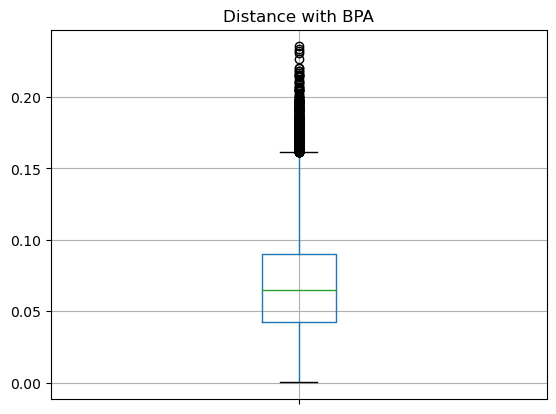

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({"": bpa_dist}) # transform to a dataframe
df2 = pd.DataFrame({"": poiss_dist})
# Some graphs
ax1 = df.boxplot(return_type="axes") # BOXPLOT
plt.title("Distance with BPA")
#ax2 = df2.boxplot(return_type="axes")
plt.show()

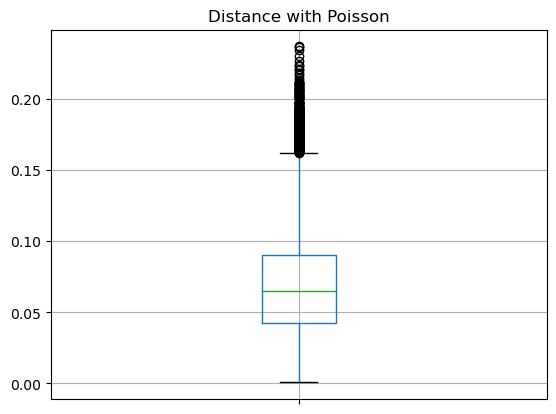

In [16]:
df2 = pd.DataFrame({"": poiss_dist})

ax1 = df2.boxplot(return_type="axes") # BOXPLOT
plt.title("Distance with Poisson")
plt.show()

In [17]:
o3d.visualization.draw_geometries([bpa_samp])

In [18]:
# Animation callback function. it needs to contain as a minimum the visualizer reference
def rotate_around(vis):
    # We create a 3D rotation matrix from x,y,z rotations, the rotations need to be given in radians
    R = mesh.get_rotation_matrix_from_xyz((0, np.deg2rad(1), 0))
    # The rotation matrix is applied to the specified object - in our case the mesh. We can also specify the rotation pivot center
    mesh.rotate(R, center=np.mean(mesh.vertices,0))

    # We create a 3D rotation matrix for the sphere as well in the opposite direction
    R_sphere = mesh.get_rotation_matrix_from_xyz((0, np.deg2rad(-4), 0))
    # Apply it
    sphere_mesh.rotate(R_sphere, center=(0, 0, 0))
    # For the changes to be seen we need to update both the geometry that has been changed and to update the whole renderer connected to the visualizer
    vis.update_geometry(mesh)
    vis.update_geometry(sphere_mesh)
    vis.update_renderer()

if __name__ == '__main__':

    print(o3d.__version__)

    # Load mesh, together with setting the flag for post-processing to True, so the texture and material will be loaded
    mesh_path = "bunny_w_N.csv"   #'mesh/angelStatue_lp.obj'
    mesh = o3d.io.read_triangle_mesh(output_path+"bunny_poisson.ply")
    mesh.paint_uniform_color([0.2, 0.2, 1])
    mesh.compute_vertex_normals()

    print(mesh)
    print('Vertices:')
    print(np.asarray(mesh.vertices))
    print('Triangles:')
    print(np.asarray(mesh.triangles))


    # We can extract information from the mesh like faces, UVs and texture
    mesh_faces = mesh.triangles
    mesh_uvs = mesh.triangle_uvs
    texture = mesh.textures



    # We create a visualizer object that will contain references to the created window, the 3D objects and will listen to callbacks for key presses, animations, etc.
    vis = o3d.visualization.Visualizer()
    # New window, where we can set the name, the width and height, as well as the position on the screen
    vis.create_window(window_name='Angel Visualize', width=800, height=600)

    # We call add_geometry to add a mesh or point cloud to the visualizer
    vis.add_geometry(mesh)

    # We can easily create primitives like cubes, sphere, cylinders, etc. In our case we create a sphere and specify its radius
    sphere_mesh = o3d.geometry.TriangleMesh.create_sphere(radius=0.05)

    # We can compute either vertex or face normals
    sphere_mesh.compute_vertex_normals()
    # Add the sphere to the visualizer
    vis.add_geometry(sphere_mesh)
    # Translate it from the center
    sphere_mesh.translate((1, 0, 0))

    #Initial rotation
    R = mesh.get_rotation_matrix_from_xyz((-np.deg2rad(60), 0, 0))
    mesh.rotate(R, center=(0, 0, 20))
    vis.update_geometry(mesh)
    vis.update_geometry(sphere_mesh)
    vis.update_renderer()

    # We can register callback animation functions that will be run on every update cycle
    vis.register_animation_callback(rotate_around)
    # We run the visualizater
    vis.run()
    # Once the visualizer is closed destroy the window and clean up
    vis.destroy_window()

0.16.1
TriangleMesh with 11923 points and 23838 triangles.
Vertices:
[[-8.47325325e+00 -1.47753763e+01  9.30595398e-03]
 [-8.56535339e+00 -1.47175264e+01  9.30595398e-03]
 [-8.02754784e+00 -1.47806520e+01  9.30595398e-03]
 ...
 [-4.85038757e-03  7.56774139e+00  4.95606918e+01]
 [-4.85038757e-03  6.67633057e+00  4.96164703e+01]
 [-8.96261215e-01  6.23062515e+00  4.97645111e+01]]
Triangles:
[[   1   25    0]
 [  25   26    2]
 [   2    0   25]
 ...
 [8906 8518 8508]
 [8883 8509 8502]
 [8906 8520 8518]]
